In [324]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import pointbiserialr
import numpy as np
from scipy.optimize import minimize
import pandas as pd
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [325]:
df7 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\contact_final.csv')
df3 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\Merged_dataset.csv')
df6 = pd.read_csv(r'C:/Users/ASUS/Desktop/Stat995 project/Merged_All.csv')

In [326]:
df7= df7[df7['Month'].isin([8, 9, 10, 11, 12, 1])]

In [327]:
df8 = df7[df7['mediaTypeName'].str.contains('WorkItem')]


In [328]:
df4=df7[df7['mediaTypeName'].str.contains('Call')]


# OBJECTIVE 1

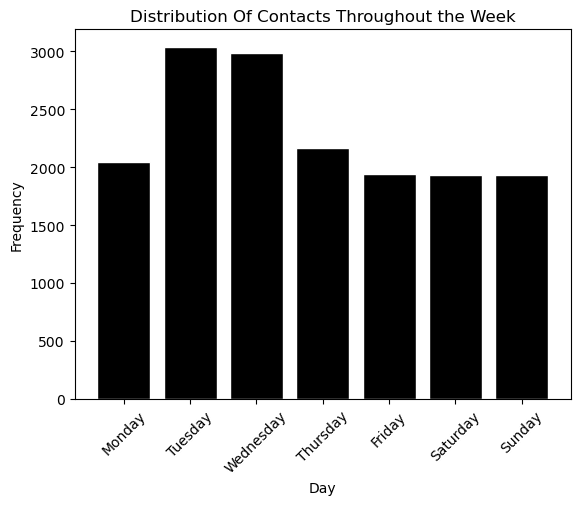

In [329]:
#OBJECTIVE 1: DISTRIBUTION OF CONTACTS THROUGHOUT WEEK
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df4['Day'] = pd.Categorical(df4['Day'], categories=days_order, ordered=True)
day_counts = df4['Day'].value_counts().sort_index()
plt.bar(day_counts.index, day_counts.values, color='black', edgecolor='white')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution Of Contacts Throughout the Week')
plt.xticks(rotation=45) 
plt.show()


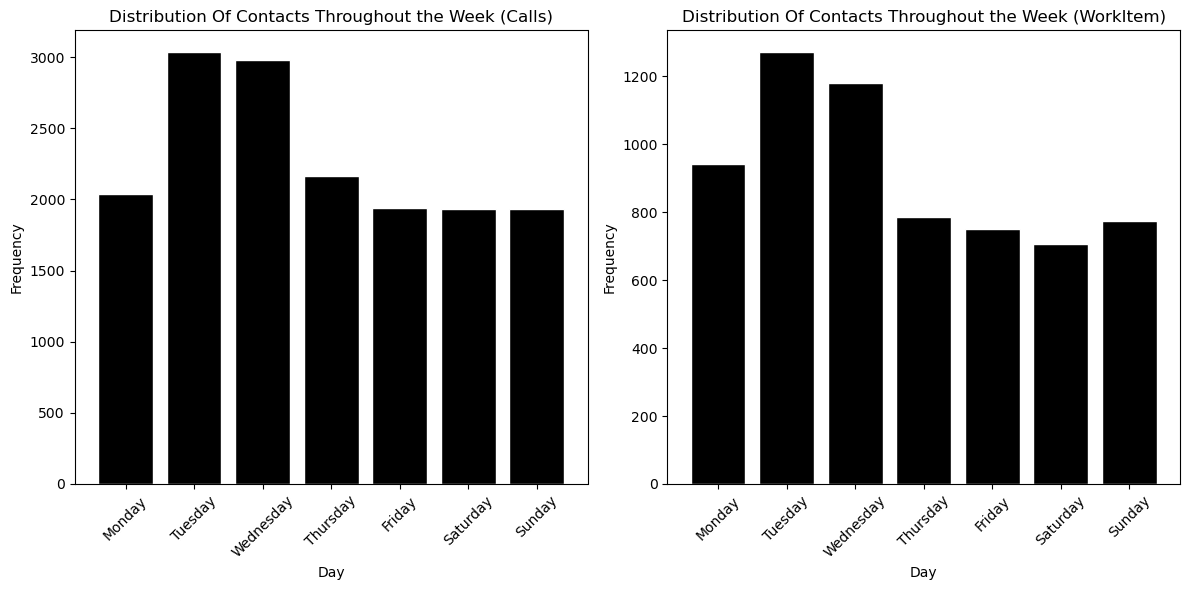

In [330]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for df4
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df4['Day'] = pd.Categorical(df4['Day'], categories=days_order, ordered=True)
day_counts = df4['Day'].value_counts().sort_index()
axes[0].bar(day_counts.index, day_counts.values, color='black', edgecolor='white')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution Of Contacts Throughout the Week (Calls)')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df8
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df8['Day'] = pd.Categorical(df8['Day'], categories=days_order, ordered=True)
day_counts = df8['Day'].value_counts().sort_index()
axes[1].bar(day_counts.index, day_counts.values, color='black', edgecolor='white')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution Of Contacts Throughout the Week (WorkItem)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


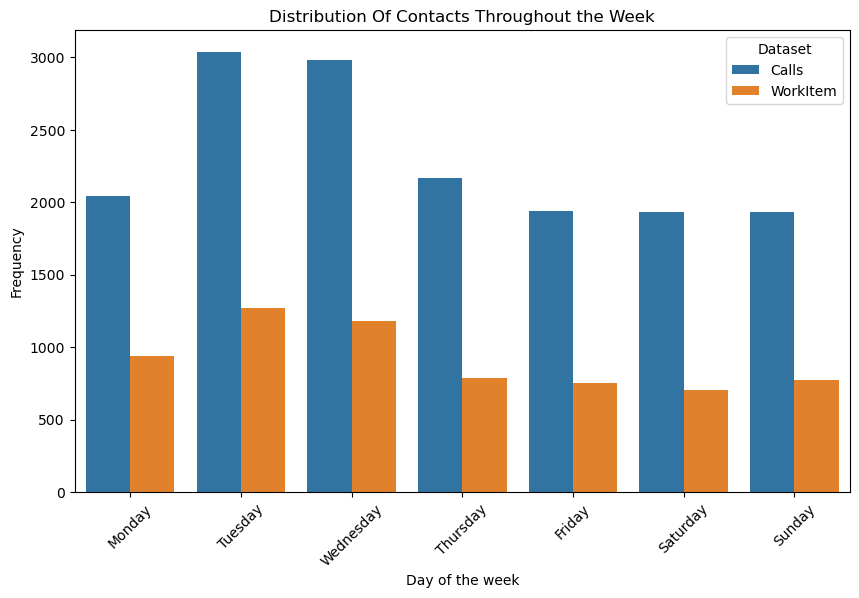

In [331]:
df4['dataset'] = 'Calls'
df8['dataset'] = 'WorkItem'
combined_df = pd.concat([df4, df8])
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Day', hue='dataset', order=days_order)#,palette={'Calls': 'lightgreen', 'WorkItem': 'green'})
plt.title('Distribution Of Contacts Throughout the Week')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

In [332]:
df7['Time_N']

971       3:00 AM
972       3:00 AM
973       3:00 AM
974       3:00 AM
975       2:00 AM
           ...   
85836    12:00 PM
85837    12:00 PM
85838    12:00 PM
85839    12:00 PM
85840    12:00 PM
Name: Time_N, Length: 22429, dtype: object

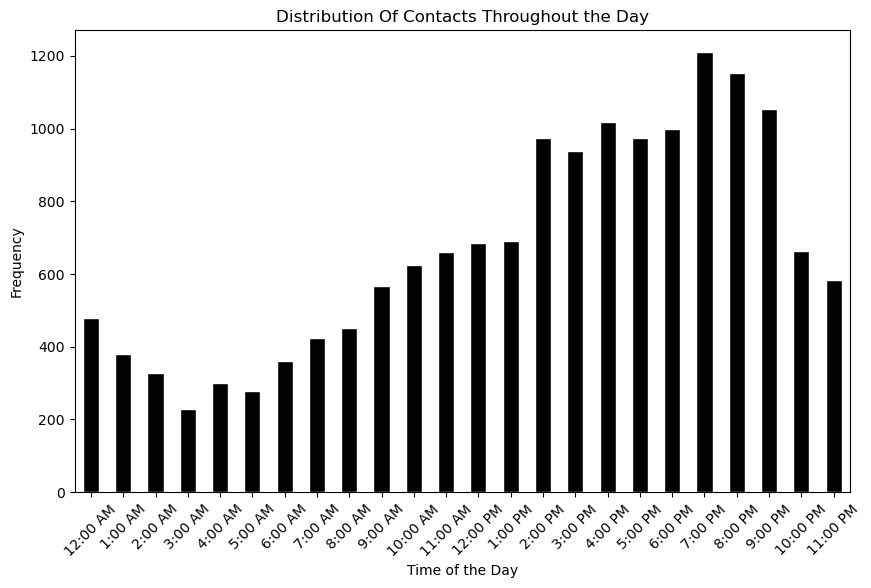

In [333]:
#OBJECTIVE 1: DISTRIBUTION OF CONTACTS THROUGHOUT DAY
plt.figure(figsize=(10, 6))
colummn_name= df4.columns
hours_ordered = ['12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM',
                '5:00 AM', '6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM',
               '10:00 AM', '11:00 AM', '12:00 PM', '1:00 PM', '2:00 PM',
               '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM',
            '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM']
#hours_ordered = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM',
#                '05 AM', '06 AM', '07 AM', '08 AM', '09 AM',
 #               '10 AM', '11 AM', '12 PM', '01 PM', '02 PM',
  #            '03 PM', '04 PM', '05 PM', '06 PM', '07 PM',
   #           '08 PM', '09 PM', '10 PM', '11 PM']
df4['Time_N'].value_counts().loc[hours_ordered ].plot.bar(color='black', edgecolor='white')
plt.title('Distribution Of Contacts Throughout the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

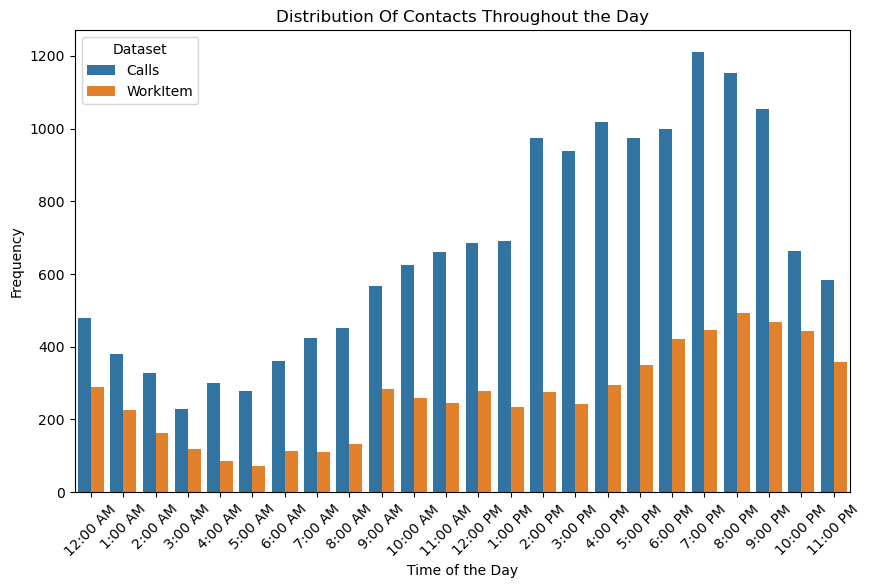

In [334]:
df4['dataset'] = 'Calls'
df8['dataset'] = 'WorkItem'
combined_df = pd.concat([df4, df8])
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Time_N', hue='dataset', order=hours_ordered)#, palette={'Calls': 'lightgreen', 'WorkItem': 'green'})
plt.title('Distribution Of Contacts Throughout the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()


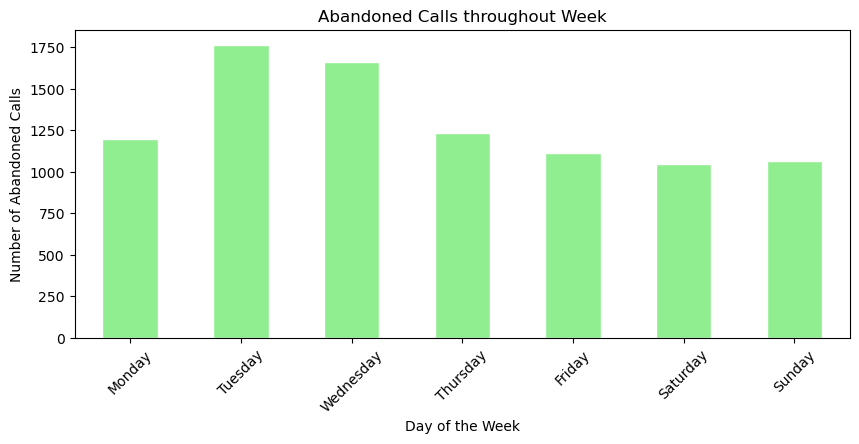

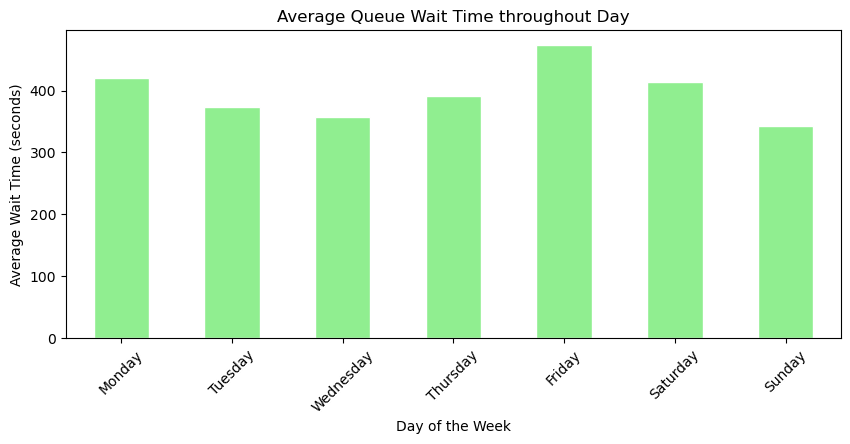

In [335]:
#Analysis by Day
# Abandoned calls analysis
abandoned_calls_by_day = df4[df4['abandoned'] == 1].groupby('Day')['contactId'].count()
plt.figure(figsize=(10, 4))
abandoned_calls_by_day.plot(kind='bar', color='lightgreen', edgecolor='white')
plt.title('Abandoned Calls throughout Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Abandoned Calls')
plt.xticks(rotation=45)
plt.show()
# Queue wait time analysis
average_wait_by_day = df4.groupby('Day')['inQueueSeconds'].mean()
plt.figure(figsize=(10, 4))
average_wait_by_day.plot(kind='bar', color='lightgreen', edgecolor='white')
plt.title('Average Queue Wait Time throughout Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Wait Time (seconds)')
plt.xticks(rotation=45)
plt.show()



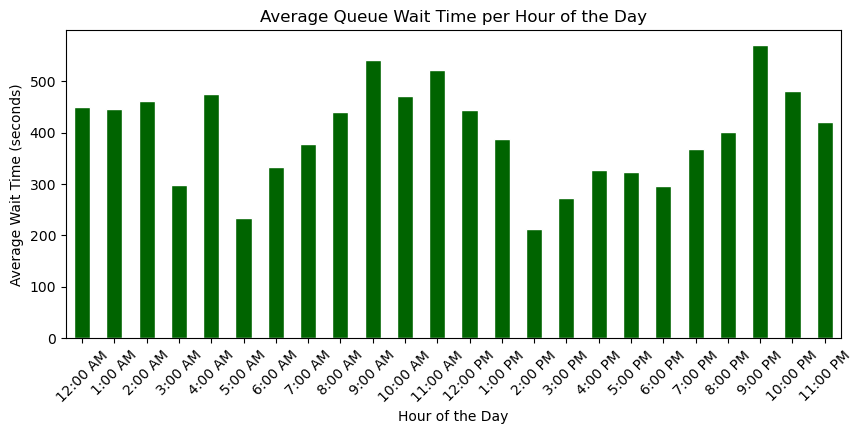

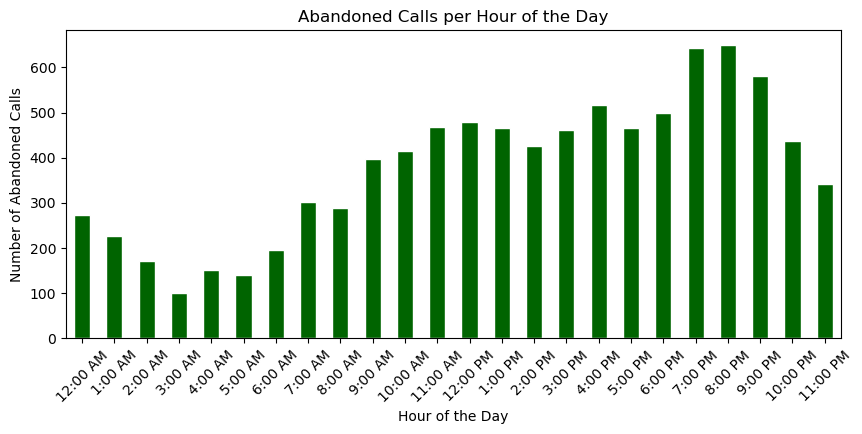

In [336]:
#Analysis by Time
abandoned_calls_by_hour = df4[df4['abandoned'] == 1].groupby('Time_N')['contactId'].count()
average_wait_by_hour = df4.groupby('Time_N')['inQueueSeconds'].mean()
average_wait_by_hour = average_wait_by_hour.reindex(hours_ordered)
abandoned_calls_by_hour = abandoned_calls_by_hour.reindex(hours_ordered)

# Plotting
plt.figure(figsize=(10, 4))
average_wait_by_hour.plot(kind='bar', color='darkgreen', edgecolor='white')
plt.title('Average Queue Wait Time per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Wait Time (seconds)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
abandoned_calls_by_hour.plot(kind='bar', color='darkgreen', edgecolor='white')
plt.title('Abandoned Calls per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Abandoned Calls')
plt.xticks(rotation=45)
plt.show()


# OBJECTIVE 2

In [337]:
#Find AHT to meet demand
AHT = df4[df4['HT'] != 0]['HT'].mean()# HT=0 is for all those calls which are abandoned or for which abandoned = 1.
AHT

1028.9150439924997

In [338]:
AHT_Min = AHT/60
AHT_Min

17.148584066541662

In [339]:
unique_values = df4['Date'].nunique()
print(unique_values)

32


In [340]:
#calls_per_day=22429/32
#calls_per_day
#calls_per_day=16023/32
#calls_per_day
#calls_per_day=85841/160
#calls_per_day
#calls_per_day=16125/32
#calls_per_day
calls_per_day=60652/149
calls_per_day

407.06040268456377

In [341]:
target_calls_per_day = 184533/365
target_calls_per_day

505.56986301369864

In [342]:
#WAY 1
target_service_level = 0.95
target_abandon_rate = 0.10
current_sl = 0.64 
current_ar = 0.31

# Functions to estimate required AHT to meet SL and AR targets
def estimate_required_aht_to_meet_sl(target_sl, current_sl, AHT):
    improvement_factor = target_sl / current_sl
    required_aht = AHT / improvement_factor
    return required_aht

def estimate_required_aht_to_meet_ar(target_ar, current_ar, AHT):
    improvement_factor = (1-target_ar) / (1-current_ar)
    required_aht = AHT*improvement_factor
    return required_aht

if target_calls_per_day > calls_per_day:
    AHT_Required = AHT * (calls_per_day / target_calls_per_day)

required_aht_for_sl = estimate_required_aht_to_meet_sl(target_service_level, current_sl, AHT)
required_aht_for_ar = estimate_required_aht_to_meet_ar(target_abandon_rate, current_ar, AHT)

print("Stricter AHT requirement to meet both SL and AR targets:", AHT_Required)


Stricter AHT requirement to meet both SL and AR targets: 828.4326317220459


In [390]:
required_aht_for_sl

693.1638191107367

In [391]:
required_aht_for_ar

1342.0631008597825

In [392]:
pip install pulp

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [393]:
import pulp
import pandas as pd
from pulp import LpMaximize, LpProblem, LpStatus, LpVariable, lpSum

# Way 2

In [394]:
total_calls = len(df4)
prob = LpProblem("AHT_Optimization", LpMaximize)

# Decision variable
aht = LpVariable("HT", lowBound=0)
constraint1_var = LpVariable("Constraint1", cat='Binary')
constraint2_var = LpVariable("Constraint2", cat='Binary')
# Constraint 1
answered_within_10_min = df4[(df4['abandoned'] == 0) & (df4['inQueueSeconds'] <= 600)].shape[0]  
prob += answered_within_10_min >= 0.95 * total_calls * constraint1_var

# Constraint 2
abandoned_after_2_min = df4[(df4['abandoned'] == 1) & (df4['abandonSeconds'] <= 120)].shape[0] 
prob += abandoned_after_2_min <= 0.10 * total_calls * constraint2_var

# Objective function
prob += lpSum(aht) / total_calls
prob.solve()
print("Status:", LpStatus[prob.status])
print("Optimized AHT:", aht.value())


Status: Infeasible
Optimized AHT: 0.0


In [395]:
df4_clean = df4.dropna(subset=['abandoned', 'inQueueSeconds'])
df4_clean = df4_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['abandoned', 'inQueueSeconds'])
corr, p_value = pointbiserialr(df4_clean['abandoned'], df4_clean['inQueueSeconds'])
print("Point-Biserial Correlation Coefficient:", corr)
print("P-value:", p_value)


Point-Biserial Correlation Coefficient: -0.14611363840810257
P-value: 3.647667725716315e-77


# OBJECTIVE 3

In [396]:
df3 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\Merged_dataset.csv')
df6 = pd.read_csv(r'C:/Users/ASUS/Desktop/Stat995 project/Merged_All.csv')

In [397]:
df5 = df3[df3['InteractionType'].str.contains('Call')]

In [398]:
df5 = df5[df5['abandoned'] == 0]

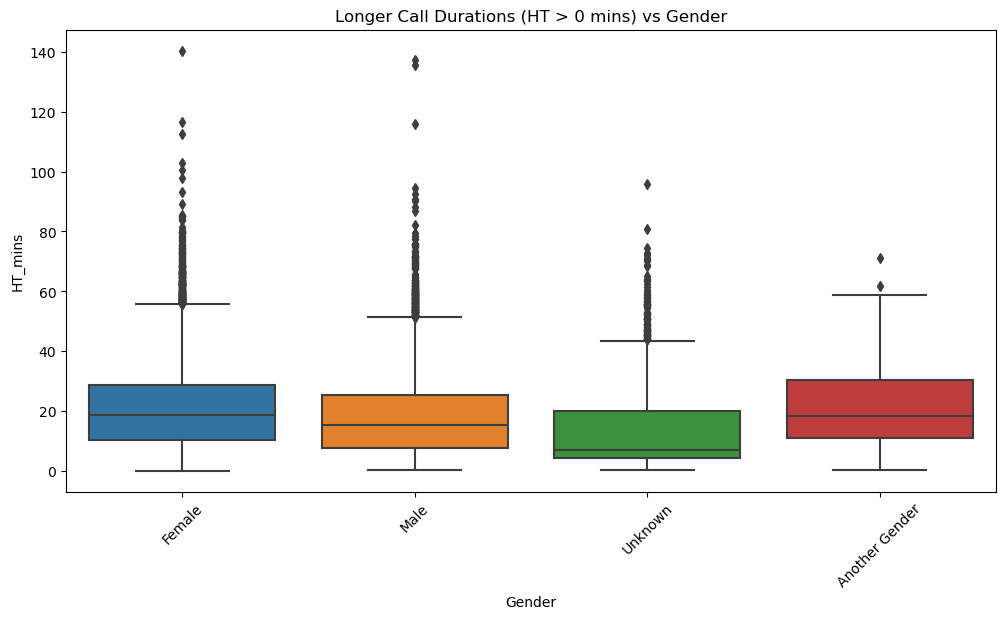

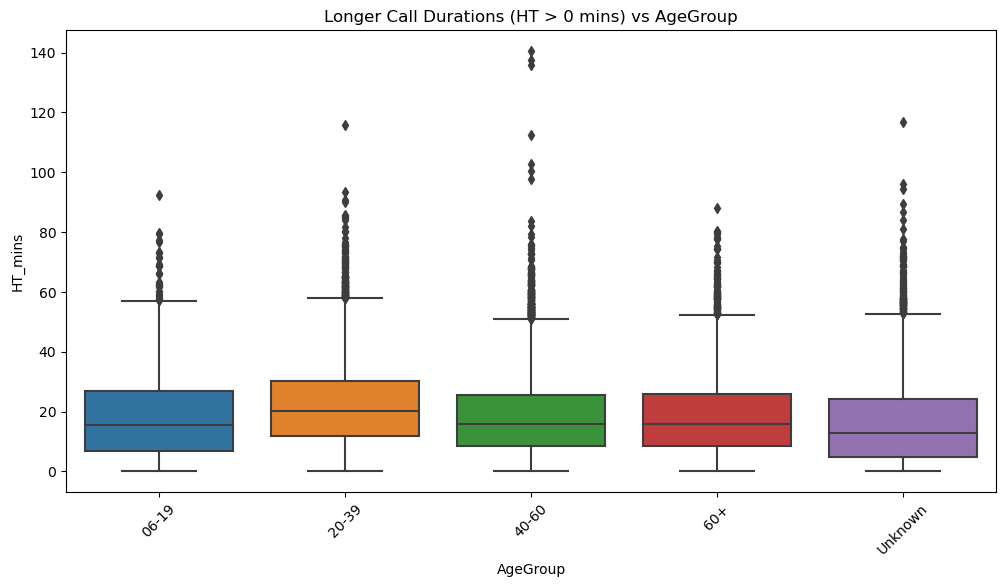

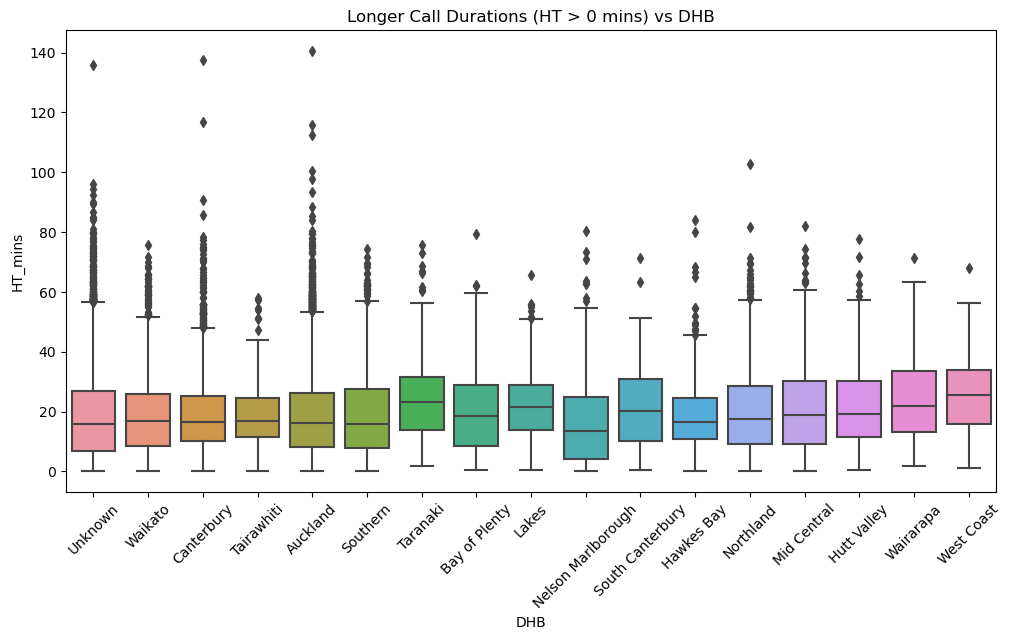

In [399]:
df5['HT_mins'] = df5['HT'] / 60
long_calls_df = df5[df5['HT_mins'] > 0]
long_calls_df['AgeGroup'] = long_calls_df['AgeGroup'].astype('category')
demographics = ['Gender', 'AgeGroup', 'DHB']
for demo in demographics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=demo, y='HT_mins', data=long_calls_df)
    plt.title(f'Longer Call Durations (HT > 0 mins) vs {demo}')
    plt.xticks(rotation=45)
    plt.show()


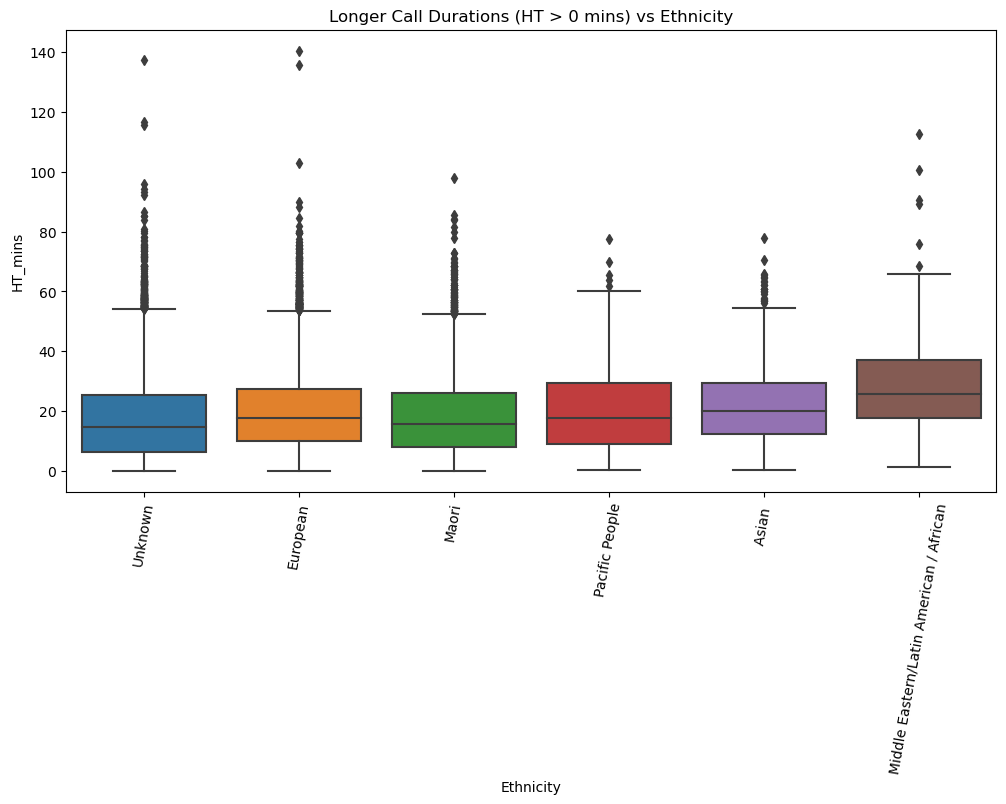

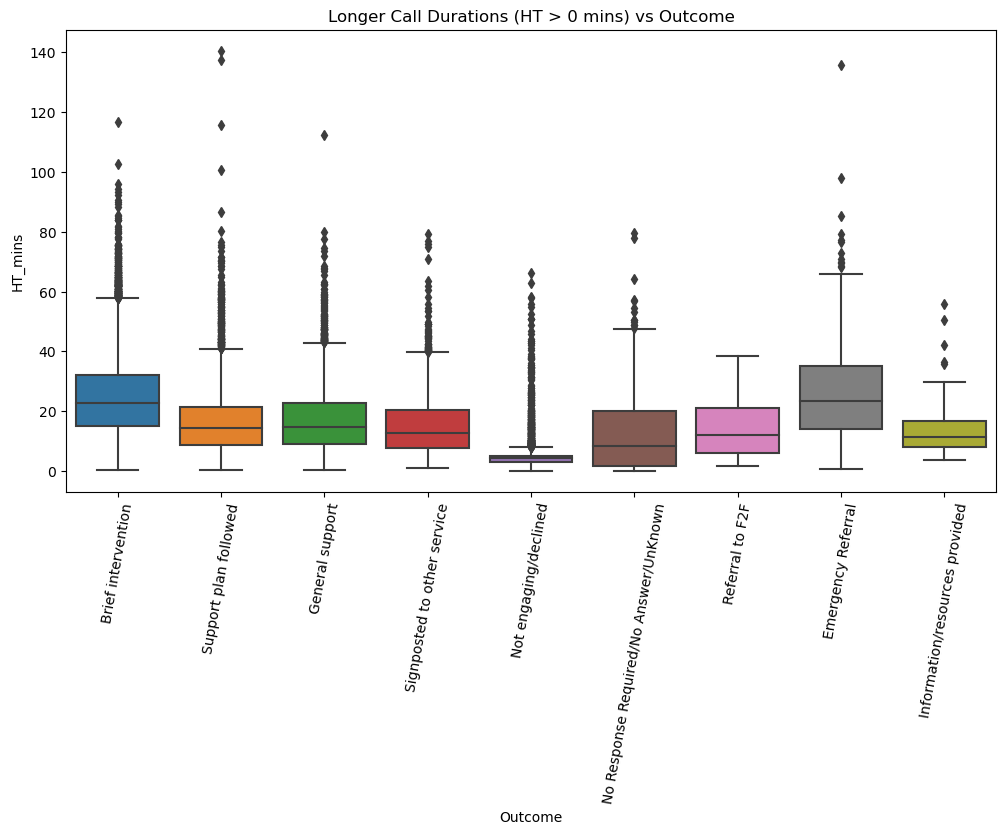

In [400]:
long_calls_df = df5[df5['HT_mins'] > 0]
demographics = ['Ethnicity', 'Outcome']
for demo in demographics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=demo, y='HT_mins', data=long_calls_df)
    plt.title(f'Longer Call Durations (HT > 0 mins) vs {demo}')
    plt.xticks(rotation=80)
    plt.show()

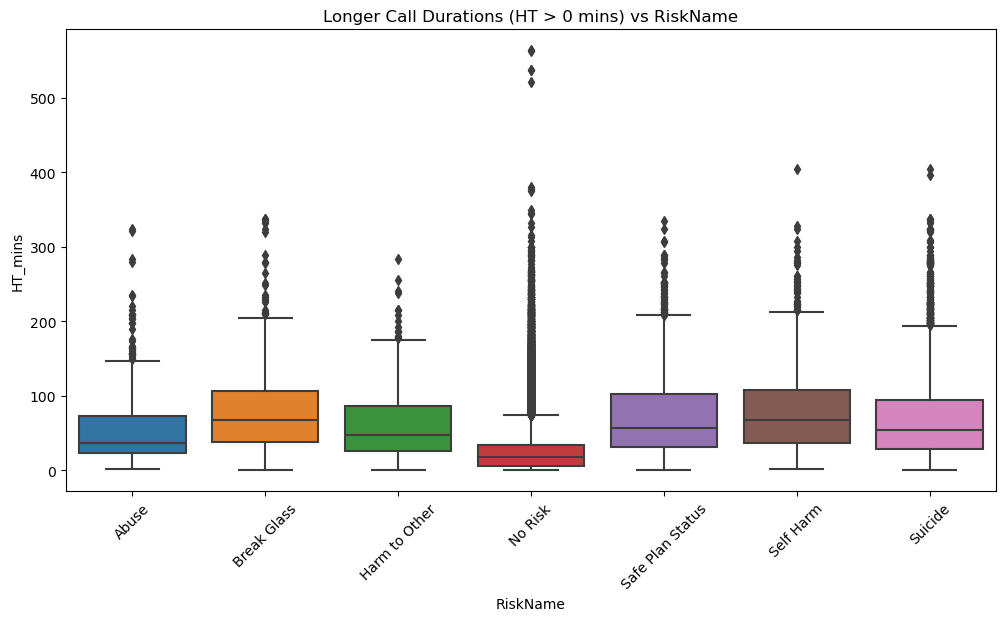

In [401]:
df6['HT_mins'] = df6['HT'] / 60
long_calls_df6 = df6[df6['HT_mins'] > 0]
long_calls_df6['RiskName'] = long_calls_df6['RiskName'].astype('category')
demographics = ['RiskName']
for demo in demographics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=demo, y='HT_mins', data=long_calls_df6)
    plt.title(f'Longer Call Durations (HT > 0 mins) vs {demo}')
    plt.xticks(rotation=45)
    plt.show()

In [402]:
# Assuming df6['RiskName'] is a list of risk names
df6['RiskName'] = ['Risk' if risk != 'No Risk' else 'No Risk' for risk in df6['RiskName']]
df6['RiskName']
df6

,abandoned,abandonSeconds,ACWSeconds,agentId,agentSeconds,businessUnitId,callbackTime,campaignId,campaignName,confSeconds,...,ConnectedMins,AgeInYears,PatientNumber,CallDetailsID,Service,InteractionType,HT,RiskName,PatientID,HT_mins
0,0.0,0.0,0.0,39163378,3563.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,59.4,7.0,PG01534953,14549402.0,Need to Talk,SMS,3563,No Risk,NaN,59.383333
1,0.0,0.0,0.0,39163378,1575.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,26.3,5.0,PH01898259,14549403.0,Need to Talk,SMS,1575,No Risk,NaN,26.250000
2,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,0.0,0.0,PI01080871,14612305.0,Need to Talk,SMS,0,No Risk,NaN,0.000000
3,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,0.0,0.0,PH02119566,14612306.0,Need to Talk,SMS,0,No Risk,NaN,0.000000
4,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,0.0,5.0,PH00719883,14612314.0,Need to Talk,SMS,0,No Risk,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78751,0.0,0.0,0.0,39163027,6638.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,110.6,0.0,PK00122207,15102144.0,Need to Talk,SMS,6638,Risk,8084709.0,110.633333
78752,0.0,0.0,0.0,39163027,1948.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,32.5,6.0,PK00079862,15102143.0,Need to Talk,SMS,1948,No Risk,NaN,32.466667
78753,0.0,0.0,0.0,39163027,11456.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,190.9,6.0,PC01467550,15102142.0,Depression,SMS,11456,No Risk,NaN,190.933333
78754,0.0,0.0,11.0,39163008,870.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,14.5,15.0,A322766,15102127.0,Need to Talk,Call,881,Risk,322766.0,14.683333


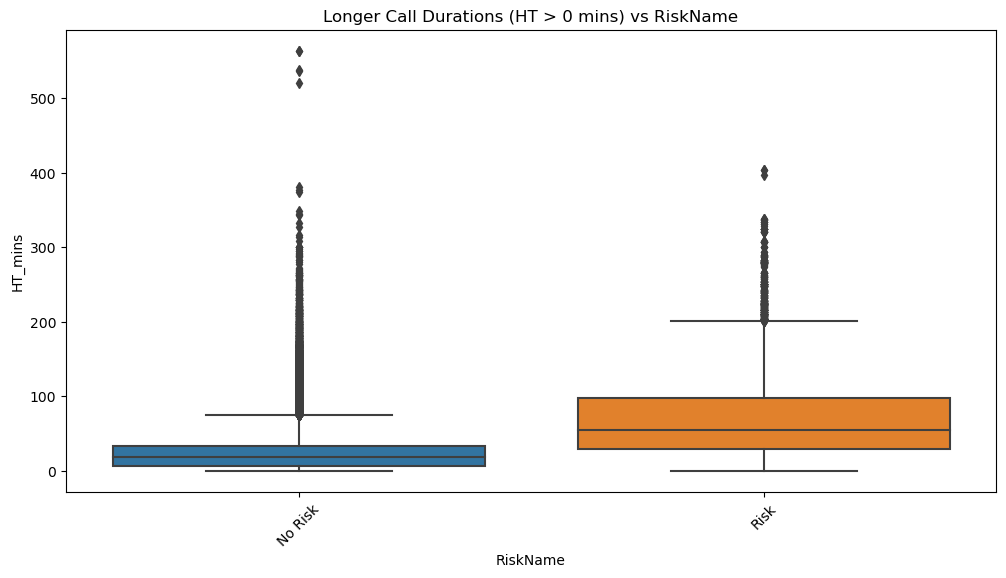

In [403]:
df6['HT_mins'] = df6['HT'] / 60
long_calls_df6 = df6[df6['HT_mins'] > 0]
long_calls_df6['RiskName'] = long_calls_df6['RiskName'].astype('category')
demographics = ['RiskName']
for demo in demographics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=demo, y='HT_mins', data=long_calls_df6)
    plt.title(f'Longer Call Durations (HT > 0 mins) vs {demo}')
    plt.xticks(rotation=45)
    plt.show()

ANOVA TEST TO CHECK SIGNIFICANCE

In [404]:
df5['HT_mins'] = df5['HT'] / 60
demographic_vars = ['Ethnicity', 'Gender', 'AgeGroup', 'DHB', 'Outcome']
for var in demographic_vars:
    df5[var] = df5[var].astype('category')
anova_results = {}

for demographic in demographic_vars:
    groups = [group['HT_mins'].dropna() for name, group in df5.groupby(demographic)]

    F, p = stats.f_oneway(*groups)
    anova_results[demographic] = {'F-statistic': F, 'p-value': p}

for demo, result in anova_results.items():
    print(f"{demo}:\nF-statistic: {result['F-statistic']}, p-value: {result['p-value']}\n")


Ethnicity:
F-statistic: 79.70282674197347, p-value: 2.291303320373936e-83

Gender:
F-statistic: 264.3671862191044, p-value: 2.4482749595468725e-169

AgeGroup:
F-statistic: 162.61967816172074, p-value: 6.040764771948026e-138

DHB:
F-statistic: 13.023957769622152, p-value: 2.1889241913409663e-35

Outcome:
F-statistic: 1278.962991658505, p-value: 0.0



In [405]:
df6['HT_mins'] = df6['HT'] / 60
demographic_vars = ['RiskName']
for var in demographic_vars:
    df6[var] = df6[var].astype('category')
anova_results = {}

for demographic in demographic_vars:
    groups = [group['HT_mins'].dropna() for name, group in df6.groupby(demographic)]

    F, p = stats.f_oneway(*groups)
    anova_results[demographic] = {'F-statistic': F, 'p-value': p}

for demo, result in anova_results.items():
    print(f"{demo}:\nF-statistic: {result['F-statistic']}, p-value: {result['p-value']}\n")


RiskName:
F-statistic: 15962.993076787863, p-value: 0.0



In [406]:
ethnicity_counts = df5['Ethnicity'].value_counts()
gender_counts = df5['Gender'].value_counts()
agegroup_counts = df5['AgeGroup'].value_counts()
dhb_counts = df5['DHB'].value_counts()
outcome_counts = df5['Outcome'].value_counts()
print("Ethnicity Counts:", ethnicity_counts)
print("Gender Counts:", gender_counts)
print("Age Group Counts:", agegroup_counts)
print("DHB Counts:", dhb_counts)
print("Outcome Counts:", outcome_counts)



Ethnicity Counts: European                                   11581
Unknown                                    10822
Maori                                       4717
Asian                                       1435
Pacific People                               789
Middle Eastern/Latin American / African      321
Name: Ethnicity, dtype: int64
Gender Counts: Female            16157
Male              10896
Unknown            2448
Another Gender      164
Name: Gender, dtype: int64
Age Group Counts: 40-60      10452
20-39       7514
60+         5291
Unknown     5144
06-19       1264
Name: AgeGroup, dtype: int64
DHB Counts: Auckland              9281
Unknown               8099
Canterbury            2959
Waikato               2031
Southern              1709
Bay of Plenty          861
Northland              848
Mid Central            739
Hawkes Bay             664
Nelson Marlborough     570
Hutt Valley            492
Lakes                  477
Taranaki               307
Tairawhiti             22

# OBJECTIVE 4

In [407]:
df3 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\Merged_dataset.csv')

In [408]:
#AVERAGE HANDLING TIME OF SMS
sms_contacts = df3[(df3['InteractionType'] == 'SMS') & (df3['HT'] > 0)]
#sms_contacts = df3[df3['InteractionType'] == 'SMS']
average_handling_time = sms_contacts['HT'].mean()
print(f'Average Handling Time for SMS Contacts: {average_handling_time} seconds')

Average Handling Time for SMS Contacts: 2513.729275170854 seconds


Average Handling Time (HT) for SMS interactions: 2511.177330524606
Average Handling Time (HT) for non-SMS interactions: 1156.399603537664

Count for SMS interactions:
 SMS    39401
Name: InteractionType, dtype: int64

Count for non-SMS interactions:
 Call     29665
Chat      1726
Email     1399
Name: InteractionType, dtype: int64


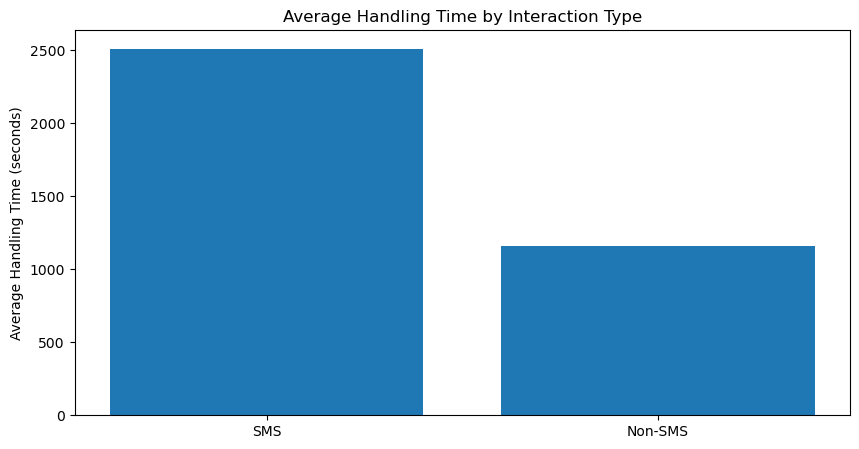

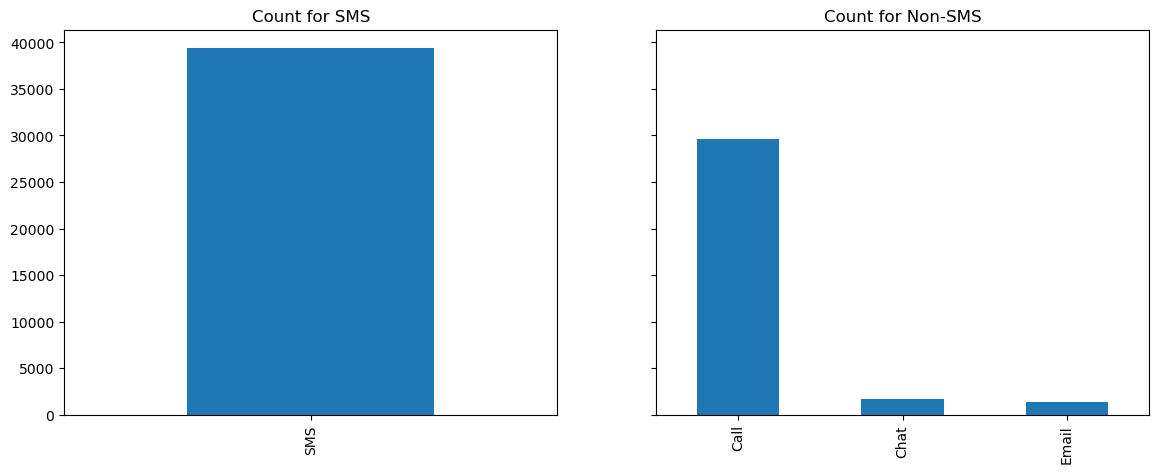

In [409]:
#IMPACT OF SMS
SMS = df3[df3['InteractionType'] == 'SMS']
Non_SMS = df3[df3['InteractionType'] != 'SMS']
AHT_SMS = SMS['HT'].mean()
AHT_Non_SMS = Non_SMS['HT'].mean()

SMS_count = SMS['InteractionType'].value_counts()
Non_SMS_count = Non_SMS['InteractionType'].value_counts()

print("Average Handling Time (HT) for SMS interactions:", AHT_SMS)
print("Average Handling Time (HT) for non-SMS interactions:", AHT_Non_SMS)
print("\nCount for SMS interactions:\n", SMS_count)
print("\nCount for non-SMS interactions:\n", Non_SMS_count)

plt.figure(figsize=(10, 5))
plt.bar(['SMS', 'Non-SMS'], [AHT_SMS, AHT_Non_SMS])
plt.title('Average Handling Time by Interaction Type')
plt.ylabel('Average Handling Time (seconds)')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
SMS_count.plot(kind='bar', ax=ax[0], title='Count for SMS')
Non_SMS_count.plot(kind='bar', ax=ax[1], title='Count for Non-SMS')
plt.show()

In [410]:
#CONCURRENT HANDLING OF SMS AND CALLS
#WILL DO AT LAST

# OBJECTIVE 5
#Way 1

In [440]:
df3 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\Merged_dataset.csv')

In [441]:
df5 = df3[df3['abandoned'] == 0]

In [442]:
# FREQUENT CALLERS
df5['contactStartUTC'] = pd.to_datetime(df5['contactStartUTC'])
df5['contact_month_year'] = df5['contactStartUTC'].dt.to_period('M')
monthly_contact_counts = df5.groupby(['PatientNumber', 'contact_month_year']).size()
frequent_callers_monthly = monthly_contact_counts[monthly_contact_counts >= 20].reset_index(name='monthly_contacts')
frequent_callers_monthly

,PatientNumber,contact_month_year,monthly_contacts
0,A077191,2023-11,22
1,A077191,2024-01,25
2,A156408,2024-01,20
3,A158494,2023-09,36
4,A158494,2023-10,57
...,...,...,...
307,PK00031054,2024-01,41
308,PK00038875,2024-01,30
309,PK00048128,2024-01,42
310,PK00073762,2024-01,22


In [443]:
# HT CORRESPONDS TO FREQUENT CALLERS
frequent_callers_data = df5[df5['PatientNumber'].isin(frequent_callers_monthly['PatientNumber'])]
total_HT_frequent_callers = frequent_callers_data['HT'].sum()
total_HT_frequent_callers

26551564

In [444]:
# ADDITIONAL CONTACTS
average_HT_per_contact = df5['HT'].mean()
additional_contacts_handled = total_HT_frequent_callers / average_HT_per_contact if average_HT_per_contact > 0 else 0
additional_contacts_handled

13998.90678407629

In [445]:
#PERCENTAGE
total_contacts = 85842
percentage_additional_contacts = (additional_contacts_handled / total_contacts) * 100
print(f"Percentage of additional contacts that could be handled: {percentage_additional_contacts:.2f}%")

Percentage of additional contacts that could be handled: 16.31%


In [446]:
#MONTHLY CONTACTS
df5['contact_month_year'] = df5['contactStartUTC'].dt.to_period('M')
monthly_contacts = df5.groupby('contact_month_year').size().reset_index(name='NumberOfContacts')
print(monthly_contacts)

  contact_month_year  NumberOfContacts
0            2023-07               168
1            2023-08             12478
2            2023-09             11679
3            2023-10             11952
4            2023-11             11750
5            2023-12             11741
6            2024-01             12390


# OBJECTIVE 5
#Way 2

In [447]:
# UNIQUE PATIENT IDs
df5['contactStartUTC'] = pd.to_datetime(df5['contactStartUTC'])
df5['contact_month'] = df5['contactStartUTC'].dt.to_period('M')
unique_patient_ids = pd.DataFrame(df5['PatientNumber'].unique(), columns=['PatientNumber'])
unique_patient_ids

,PatientNumber
0,PG01534953
1,PH01898259
2,PI01080871
3,PH02119566
4,PH00719883
...,...
27802,PG01087410
27803,PK00122140
27804,PK00122115
27805,PK00122178


In [448]:
# Monthly segregation
monthly_contacts = df5.groupby(['PatientNumber', 'contact_month']).size().reset_index(name='monthly_contacts')
monthly_contacts 

,PatientNumber,contact_month,monthly_contacts
0,A00000-139506,2024-01,1
1,A00000-214759,2024-01,1
2,A00000-242990,2023-11,1
3,A076880,2023-10,1
4,A077191,2023-08,15
...,...,...,...
34010,PK00122028,2024-01,1
34011,PK00122115,2024-01,1
34012,PK00122140,2024-01,1
34013,PK00122178,2024-01,1


In [449]:
#MERGE 
detailed_contacts = pd.merge(unique_patient_ids, monthly_contacts, on='PatientNumber', how='left')
detailed_contacts

,PatientNumber,contact_month,monthly_contacts
0,PG01534953,2023-08,2
1,PH01898259,2023-08,1
2,PI01080871,2023-08,1
3,PI01080871,2023-11,1
4,PI01080871,2023-12,4
...,...,...,...
34010,PG01087410,2024-01,1
34011,PK00122140,2024-01,1
34012,PK00122115,2024-01,1
34013,PK00122178,2024-01,1


In [450]:
# FREQUENT CALLERS
frequent_callers = detailed_contacts[detailed_contacts['monthly_contacts'] >= 20]
frequent_callers

,PatientNumber,contact_month,monthly_contacts
5,PH02119566,2023-08,61
18,C01200541,2023-09,41
19,C01200541,2023-10,37
20,C01200541,2023-11,33
21,C01200541,2023-12,44
...,...,...,...
31064,PK00038875,2024-01,30
31385,PK00048128,2024-01,42
31746,PH01720489,2024-01,24
32286,PK00073762,2024-01,22


In [451]:
# ADDITIONAL CONTACTS
frequent_callers_data = df5[df5['PatientNumber'].isin(frequent_callers['PatientNumber'])]
total_HT_frequent_callers = frequent_callers_data['HT'].sum()
average_HT_per_contact = df5['HT'].mean()
additional_contacts = total_HT_frequent_callers / average_HT_per_contact if average_HT_per_contact > 0 else 0
print(f'Total handle time for frequent callers: {total_HT_frequent_callers} seconds')
print(f'Average handle time per contact: {average_HT_per_contact:.2f} seconds')
print(f'Estimated additional contacts that could be handled: {additional_contacts:.2f}')

Total handle time for frequent callers: 26551564 seconds
Average handle time per contact: 1896.69 seconds
Estimated additional contacts that could be handled: 13998.91


# OBJECTIVE 6

In [468]:
df7 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\contact_final.csv')

In [469]:
df7= df7[df7['Month'].isin([8, 9, 10, 11, 12, 1])]

In [470]:
df7=df7[df7['abandoned'] == 0]

In [455]:
# Calls per hour by each agent
agent_performance = df7.groupby(['agentId', 'Time_N']).size().reset_index(name='Contacts_Per_Hour')
agent_performance

,agentId,Time_N,Contacts_Per_Hour
0,34596932,12:00 AM,5
1,34596933,10:00 AM,7
2,34596933,10:00 PM,4
3,34596933,11:00 AM,5
4,34596933,11:00 PM,3
...,...,...,...
941,39467346,5:00 PM,2
942,39467346,6:00 PM,4
943,39467346,7:00 PM,1
944,39467346,8:00 PM,2


In [457]:
#Average ccontacts per hour
avg_contacts_per_hour = agent_performance.groupby('agentId')['Contacts_Per_Hour'].mean().reset_index(name='Avg_Contacts_Per_Hour')
avg_contacts_per_hour

,agentId,Avg_Contacts_Per_Hour
0,34596932,5.000000
1,34596933,7.681818
2,39142200,30.083333
3,39142201,4.700000
4,39142202,12.200000
...,...,...
69,39252838,11.529412
70,39252839,11.545455
71,39340200,19.769231
72,39467345,3.428571


In [458]:
#Total calls and average handling time for each agent
sorted_agents = avg_contacts_per_hour.sort_values(by='Avg_Contacts_Per_Hour', ascending=False)
thresholds = {
    'top_20': sorted_agents['Avg_Contacts_Per_Hour'].quantile(0.80),  # 80th percentile
    'bottom_20': sorted_agents['Avg_Contacts_Per_Hour'].quantile(0.20)  # 20th percentile
}
sorted_agents

,agentId,Avg_Contacts_Per_Hour
14,39142826,47.214286
61,39163667,41.444444
57,39163655,34.250000
26,39163003,33.333333
62,39163668,33.111111
...,...,...
68,39202863,3.000000
73,39467346,2.428571
15,39142832,2.125000
47,39163233,1.750000


In [459]:
# top 20% agents
top_20_agents = sorted_agents[sorted_agents['Avg_Contacts_Per_Hour'] >= thresholds['top_20']]
top_20_agents 

,agentId,Avg_Contacts_Per_Hour
14,39142826,47.214286
61,39163667,41.444444
57,39163655,34.250000
26,39163003,33.333333
62,39163668,33.111111
67,39163768,31.111111
2,39142200,30.083333
64,39163672,26.222222
56,39163654,23.875000
35,39163060,22.583333


In [460]:
#bottom 20% agents
bottom_20_agents = sorted_agents[sorted_agents['Avg_Contacts_Per_Hour'] <= thresholds['bottom_20']]
bottom_20_agents

,agentId,Avg_Contacts_Per_Hour
45,39163216,6.857143
21,39162922,6.791667
42,39163156,5.100000
0,34596932,5.000000
22,39162930,4.857143
3,39142201,4.700000
54,39163378,3.473684
19,39162904,3.461538
72,39467345,3.428571
11,39142302,3.166667


In [461]:
#Average contacts per hour for the top and bottom 20%
top_20_avg_contacts_per_hour = top_20_agents['Avg_Contacts_Per_Hour'].mean()
bottom_20_avg_contacts_per_hour = bottom_20_agents['Avg_Contacts_Per_Hour'].mean()
top_20_total_current_contacts = top_20_agents['Avg_Contacts_Per_Hour'].sum()
bottom_20_total_current_contacts = bottom_20_agents['Avg_Contacts_Per_Hour'].sum()
print("Average contacts handled per hour by top 20%: ", top_20_avg_contacts_per_hour)
print("Average conatcts handled per hour by bottom 20%: ", bottom_20_avg_contacts_per_hour)
print("Total contacts handled by bottom 20%: ", bottom_20_total_current_contacts)
top_20_total_current_contacts

Average contacts handled per hour by top 20%:  28.644576719576715
Average conatcts handled per hour by bottom 20%:  3.809332305121779
Total contacts handled by bottom 20%:  57.139984576826684


429.6686507936507

In [462]:
# Number of agents in the bottom 20%
Bottom_20_count = len(bottom_20_agents)
Top_20_count = len(top_20_agents )
# Additional contacts if performance get matched.
additional_contacts = Bottom_20_count * (top_20_avg_contacts_per_hour - bottom_20_avg_contacts_per_hour)
print(f"Additional contacts if bottom 20% matches top 20%: {additional_contacts}")
print("Number of agents in top 20%: ", Top_20_count)
print("Number of agents in bottom 20%: ", Bottom_20_count)

Additional contacts if bottom 20% matches top 20%: 372.52866621682404
Number of agents in top 20%:  15
Number of agents in bottom 20%:  15


In [463]:
372*20*8

59520

In [464]:
# Additional contacts if performance get matched by 50%.
additional_contacts = Bottom_20_count * 0.50*(top_20_avg_contacts_per_hour - bottom_20_avg_contacts_per_hour)
print(f"Additional contacts if bottom 20% matches top 20%: {additional_contacts}")

Additional contacts if bottom 20% matches top 20%: 186.26433310841202


# OBJECTIVE 6
way 2

In [465]:
# AHT for top and bottom 20% agents
top_20_ht_avg = df7[df7['agentId'].isin(top_20_agents['agentId'])]['HT'].mean()
bottom_20_ht_avg = df7[df7['agentId'].isin(bottom_20_agents['agentId'])]['HT'].mean()
print("Top 20% Average Handling Time: ", top_20_ht_avg )
print("Bottom 20% Average Handling Time: ", bottom_20_ht_avg)

Top 20% Average Handling Time:  1400.6462599247807
Bottom 20% Average Handling Time:  1719.9137645107794


In [466]:
# Additional contacts if performance completelty matches
increase_percentage = bottom_20_ht_avg  / top_20_ht_avg
additional_contacts = bottom_20_total_current_contacts * (increase_percentage - 1)
print('Percentage increse in HT  if performance get matched: ', increase_percentage)
print(f'Number of more contacts that can be handled: {additional_contacts:.0f} contacts')

Percentage increse in HT  if performance get matched:  1.2279429958304708
Number of more contacts that can be handled: 13 contacts


In [467]:
# Additional contacts if 50% perfomance matches
increase_percentage = bottom_20_ht_avg  / top_20_ht_avg
additional_contacts = 0.50*bottom_20_total_current_contacts * (increase_percentage - 1)
print('Percentage increse in HT  if performance get matched: ', increase_percentage)
print(f'Number of more contacts that can be handled: {additional_contacts:.0f} contacts')

Percentage increse in HT  if performance get matched:  1.2279429958304708
Number of more contacts that can be handled: 7 contacts
